In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math

In [2]:
#importing th data set

dataset = pd.read_csv("C:/Users/Mohil/Documents/Quarter 2/CS 613/x06Simple.csv")

In [3]:
#randomizing the data set

data = dataset.iloc[:,:].values
d = len(dataset.iloc[0,:].values)

np.random.seed(0)
np.random.shuffle(data)

x = data[:,[1,d-2]]
y = data[:,d-1]

In [4]:
#splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [5]:
#standardizing the feature vector

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis =0, ddof=0)
x_train = (x_train-mean)/std

x_test = (x_test-mean)/std

In [6]:
#adding bias to feature vector
bias = []
for i in range(0,len(x_train)):
    bias.insert(i,[1]) 

x_train = np.insert(x_train,[0],bias, axis=1)

bias = []
for i in range(0,len(x_test)):
    bias.insert(i,[1]) 

x_test = np.insert(x_test,[0],bias, axis=1)


[3058.6650908  1259.47191497 -248.4326262 ]
582.3942155657766
576.3226321847862


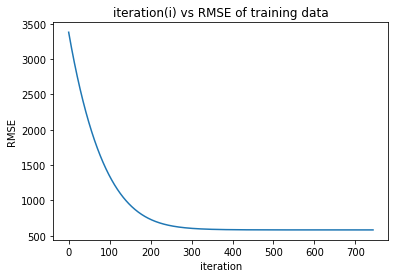

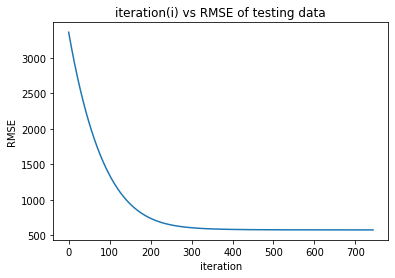

In [7]:

np.random.seed(0)

x_transpose = x_train.transpose()
#learning rate
rate = 0.01
n1 = len(x_train)
n2 = len(x_test)
theta  = []

y_pred_train = []
y_pred_test = []
rmse_train = []
rmse_test = []
rmse = 1

x =[]

for i in range(0,d-1):
    theta.append(np.random.uniform(-1,1))

t = len(theta)

for i in range(0,1000):
    
    x.append(i)
    prev_rmse = rmse
    
    #calculating the rmse
    for j in range(0,n1):
        y_pred_train.insert(j,np.dot(x_train[j], theta))   
    
    sum = 0
    for k in range(0,n1):
        sum = sum + pow(y_train[k]-y_pred_train[k],2)
    
    rmse = math.sqrt(sum/n1)
    rmse_train.append(rmse)
    
    for j in range(0,n2):
        y_pred_test.insert(j,np.dot(x_test[j], theta))   
    
    sum = 0
    for k in range(0,n2):
        sum = sum + pow(y_test[k]-y_pred_test[k],2)

    rmse_test.append(math.sqrt(sum/n2))
    
    #updating the theta values
    
    xty = np.subtract(np.dot(x_train,theta), y_train)
    update = (rate/n1)*np.dot(x_transpose,xty)
    prev_theta = theta
    theta = np.subtract(theta,update)
    
    #applying the second condition
    change = abs((rmse - prev_rmse)/prev_rmse)
    
    if change < pow(2,-23):
        break

print(prev_theta)
print(rmse_train[i])
print(rmse_test[i])

plt.plot(x, rmse_train) 
plt.title('iteration(i) vs RMSE of training data')
plt.xlabel('iteration')
plt.ylabel('RMSE')
plt.show()

plt.plot(x, rmse_test)
plt.title('iteration(i) vs RMSE of testing data')
plt.xlabel('iteration')
plt.ylabel('RMSE')
plt.show()


    

